<a href="https://colab.research.google.com/github/fatecitu/qualidade-vinho/blob/main/vinho_verde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Vinho Verde 🍷

Esse projeto....

## Importando os módulos necessários

In [28]:
# importa a biblioteca Pandas
import pandas as pd
# importa a biblioteca numpy
import numpy as np
# importa a biblioteca seaborn para visualização dos dados estatísticos
import seaborn as sns
# importa a biblioteca matplotlib para visualização gráfica
import matplotlib.pyplot as plt
# gerenciamento de alertas
import warnings
# Configura o ambiente para exibição dos gráfico no próprio notebook
%matplotlib inline
# Configurar o warning para ignorar alertas na execução
warnings.filterwarnings('ignore')

## Carregando o dataset

In [2]:
ds = pd.read_csv('https://raw.githubusercontent.com/fatecitu/qualidade-vinho/main/winequalityN.csv')

In [5]:
# dados das 5 primeiras linhas
ds.head(5)  #ds -dataset ou df - dataframe

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
# dados das 5 últimas linhas
ds.tail() 

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [13]:
# renomeando as colunas
colunas = {
    'type' : 'tipo',
    'fixed acidity' : 'acidez fixa',
    'volatile acidity' : 'acidez volátil',
    'citric acid' : 'ácido cítrico',
    'residual sugar' : 'açúcar residual',
    'chlorides' : 'cloreto',
    'free sulfur dioxide' : 'dióxido de enxofre livre',
    'total sulfur dioxide' : 'dióxido de enxofre total',
    'density' : 'densidade',
    'pH' : 'pH',
    'sulphates' : 'sulfatos',
    'alcohol': 'álcool',
    'quality': 'qualidade'
}
# renomeando no dataframe
ds = ds.rename(columns=colunas)

In [14]:
# visualizando os dados
ds.head()

,tipo,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloreto,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,álcool,qualidade
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [15]:
# informações estatísticas
ds.describe()

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloreto,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,álcool,qualidade
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [19]:
# informação sobre os tipos de dados
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tipo                      6497 non-null   object 
 1   acidez fixa               6487 non-null   float64
 2   acidez volátil            6489 non-null   float64
 3   ácido cítrico             6494 non-null   float64
 4   açúcar residual           6495 non-null   float64
 5   cloreto                   6495 non-null   float64
 6   dióxido de enxofre livre  6497 non-null   float64
 7   dióxido de enxofre total  6497 non-null   float64
 8   densidade                 6497 non-null   float64
 9   pH                        6488 non-null   float64
 10  sulfatos                  6493 non-null   float64
 11  álcool                    6497 non-null   float64
 12  qualidade                 6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [20]:
# Correlação entre as colunas (indica a força e a direção da relação linear entre 2 variáveis)
ds.corr()

<ipython-input-20-64a2400a53cc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds.corr()


,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloreto,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,álcool,qualidade
acidez fixa,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
acidez volátil,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
ácido cítrico,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
açúcar residual,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
cloreto,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
dióxido de enxofre livre,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
dióxido de enxofre total,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
densidade,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulfatos,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


## Pré processando o Dataset

In [22]:
# Verificando por valores nulos
ds.isnull().sum()

tipo                         0
acidez fixa                 10
acidez volátil               8
ácido cítrico                3
açúcar residual              2
cloreto                      2
dióxido de enxofre livre     0
dióxido de enxofre total     0
densidade                    0
pH                           9
sulfatos                     4
álcool                       0
qualidade                    0
dtype: int64

In [23]:
# Preenchendo os valores nulos com a média
for col, value in ds.items():
  if col != 'tipo': #ignorando a coluna tipo
    ds[col] = ds[col].fillna(ds[col].mean())

In [25]:
ds.isnull().sum()

tipo                        0
acidez fixa                 0
acidez volátil              0
ácido cítrico               0
açúcar residual             0
cloreto                     0
dióxido de enxofre livre    0
dióxido de enxofre total    0
densidade                   0
pH                          0
sulfatos                    0
álcool                      0
qualidade                   0
dtype: int64

In [26]:
# Obtendo o tamanho do dataset
ds.shape

(6497, 13)

In [27]:
# Obtendo os valores máximos
ds.max()

tipo                          white
acidez fixa                    15.9
acidez volátil                 1.58
ácido cítrico                  1.66
açúcar residual                65.8
cloreto                       0.611
dióxido de enxofre livre      289.0
dióxido de enxofre total      440.0
densidade                   1.03898
pH                             4.01
sulfatos                        2.0
álcool                         14.9
qualidade                         9
dtype: object

## Análise e Visualização dos Dados

<Axes: >

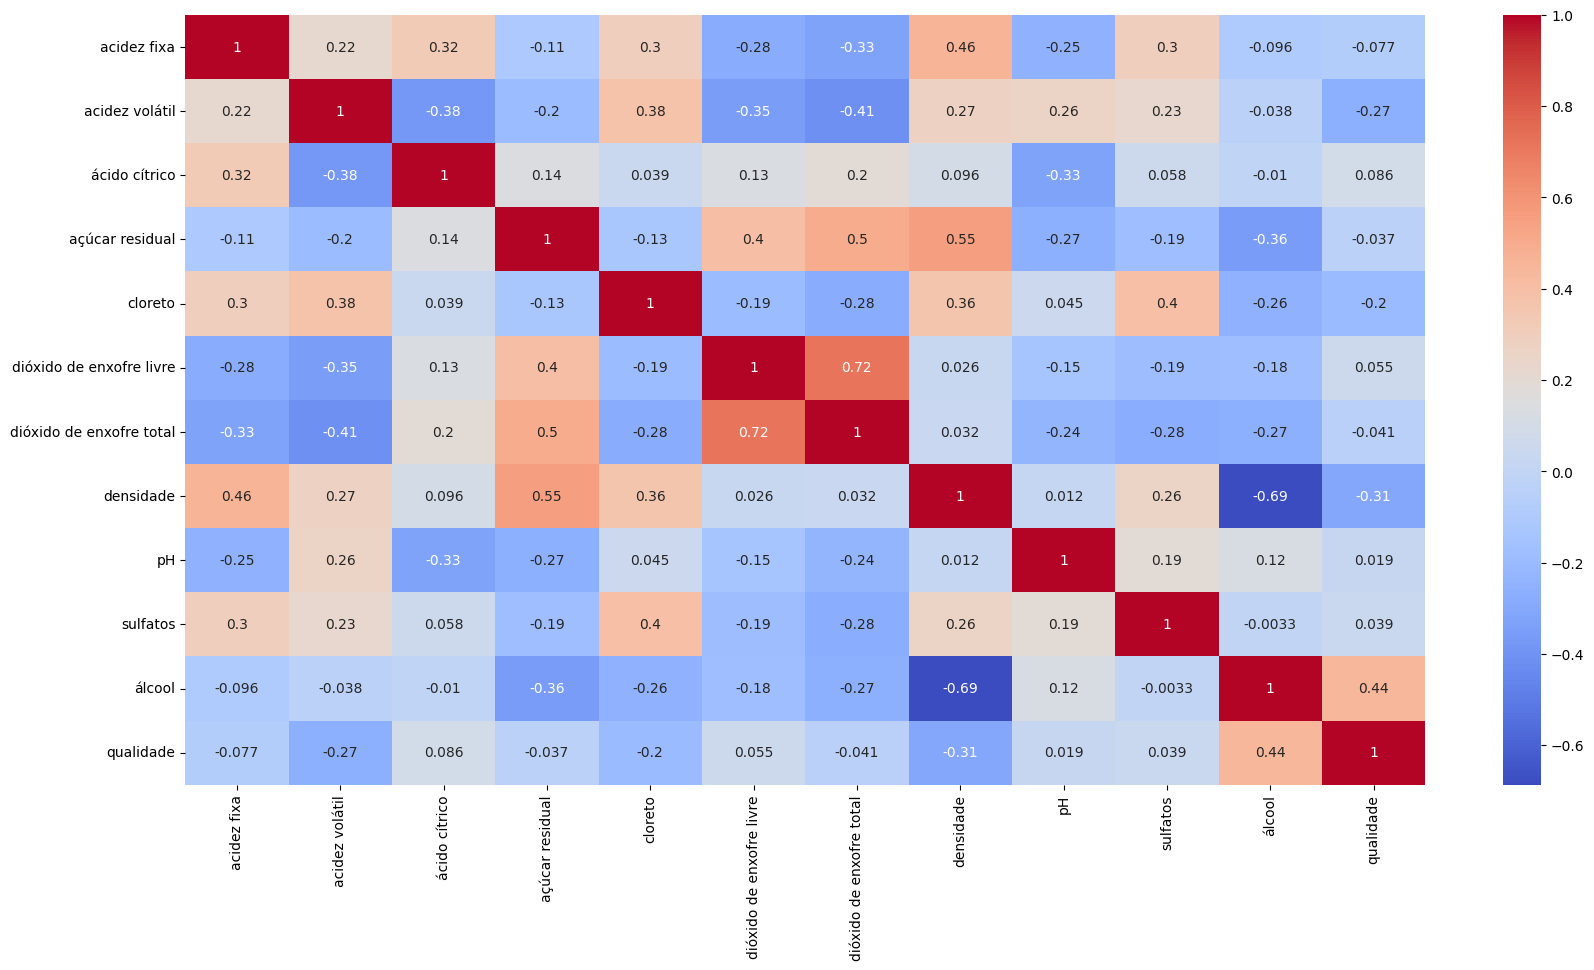

In [29]:
# Mapa de calor da matriz de correlação
corr = ds.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

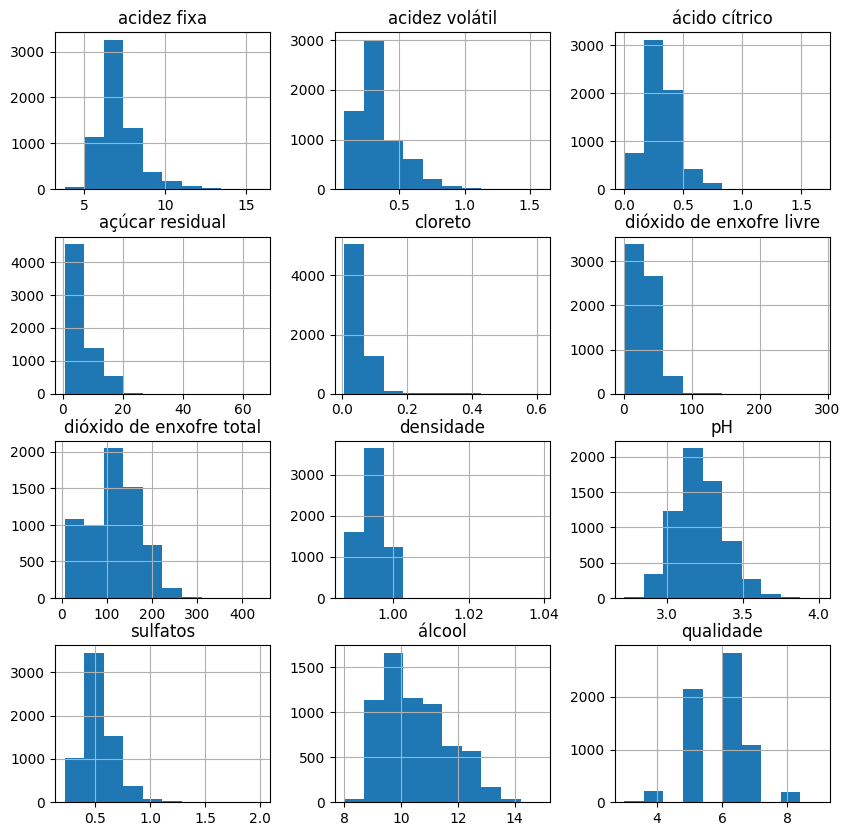

In [30]:
# Plotar o histograma para mostrar a distribuição dos valores
ds.hist(figsize = (10,10))
plt.show()

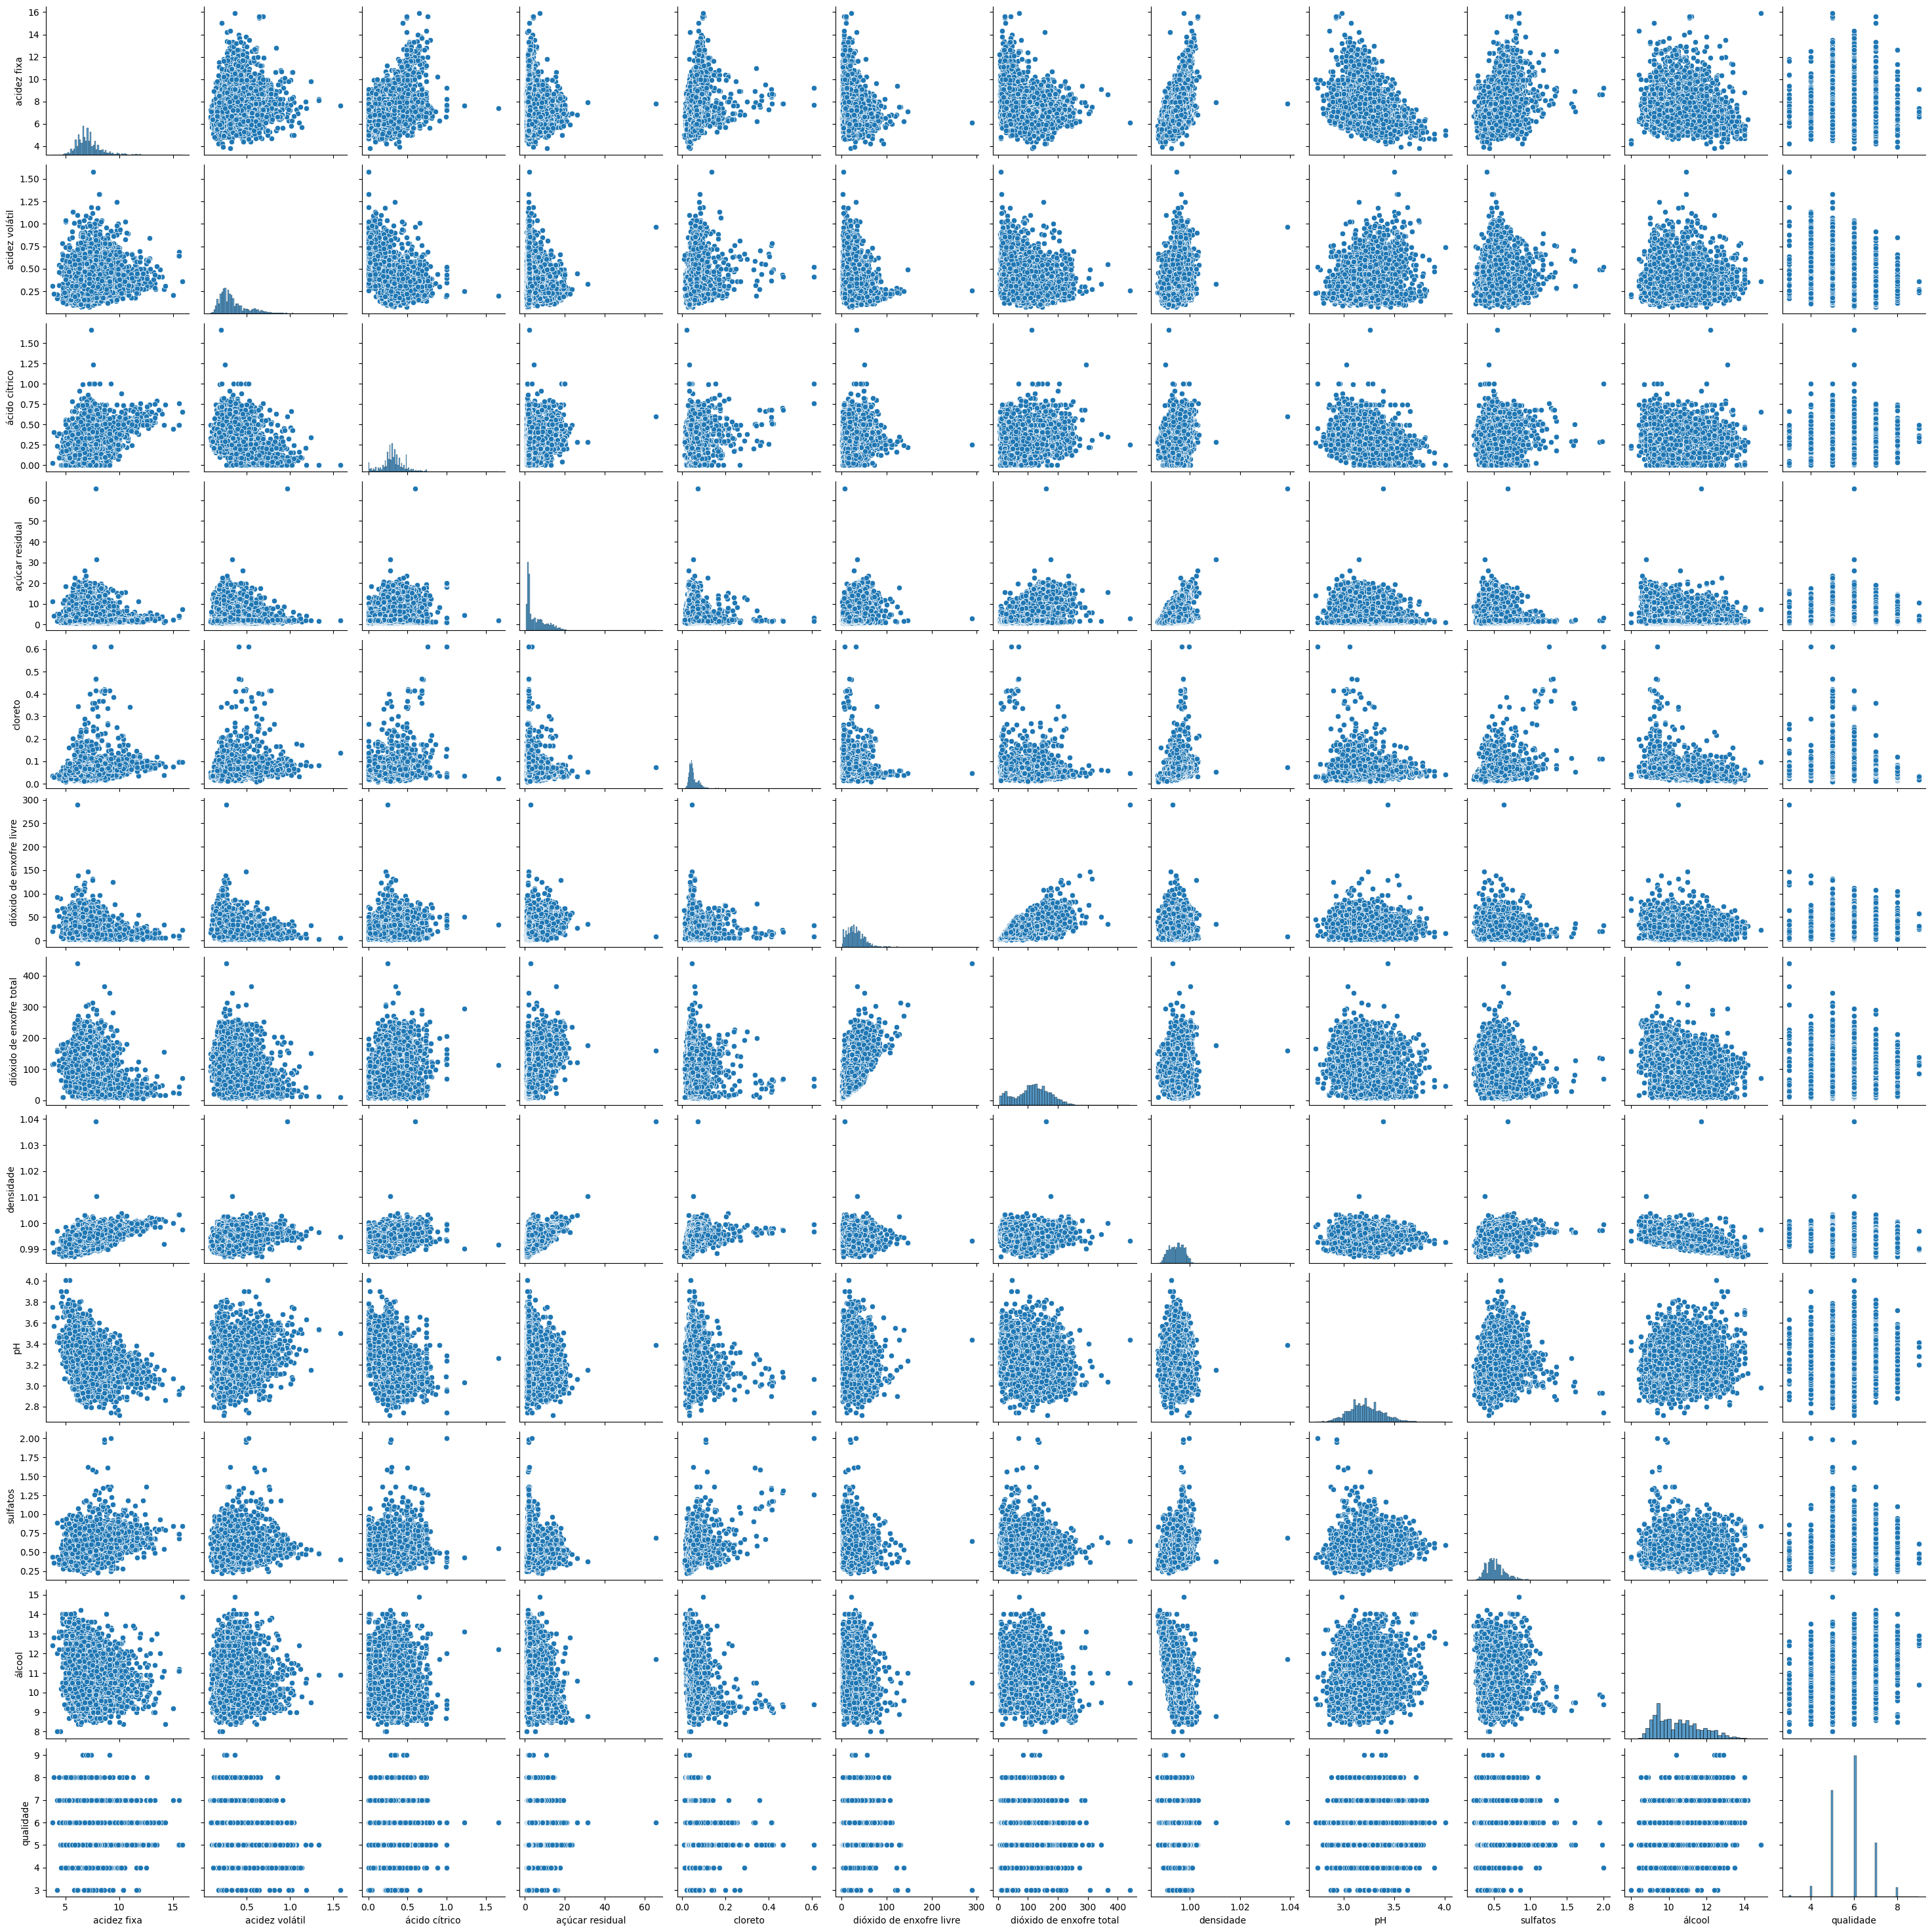

In [31]:
# Plotar as relações entre as variáveis no conjunto de dados
sns.pairplot(ds)

<Axes: xlabel='ácido cítrico', ylabel='Density'>

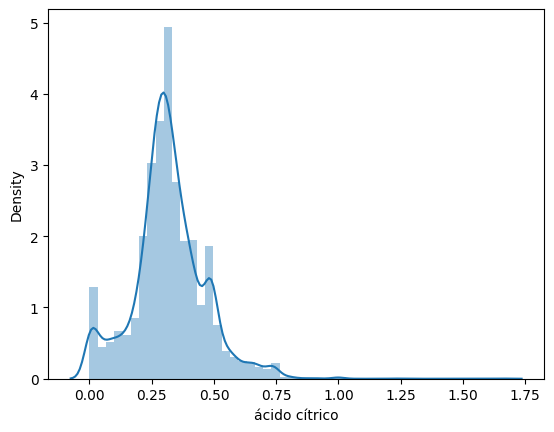

In [32]:
# plotando os valores de distribuição da coluna ácido cítrico
sns.distplot(ds['ácido cítrico'])

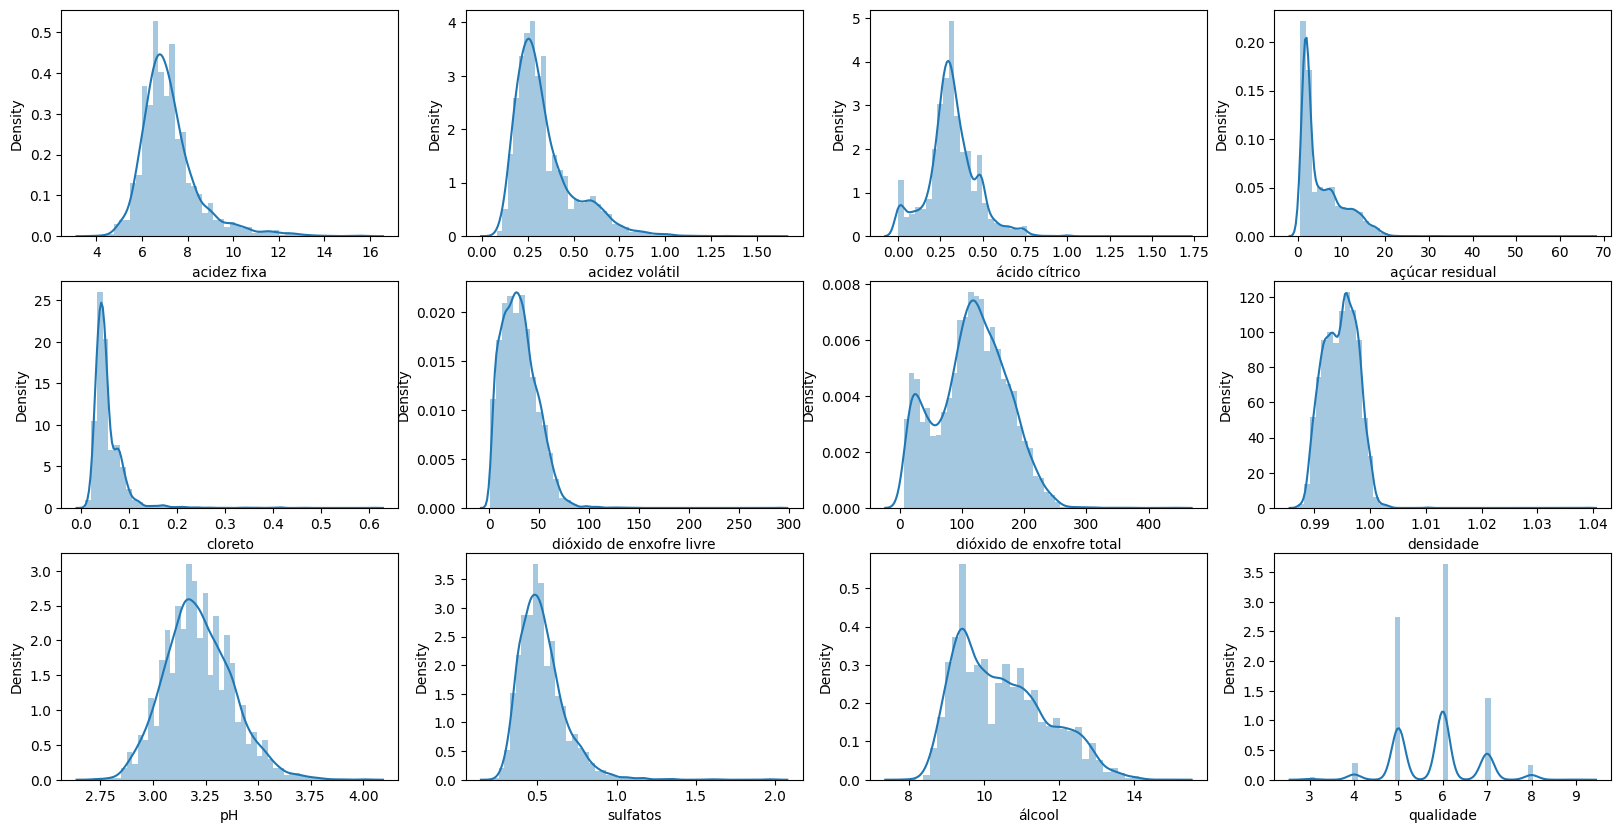

In [35]:
# plotando os valores de distribuição para cada coluna
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in ds.items():
    if col != 'tipo':
      sns.distplot(value, ax=ax[index])
      index += 1

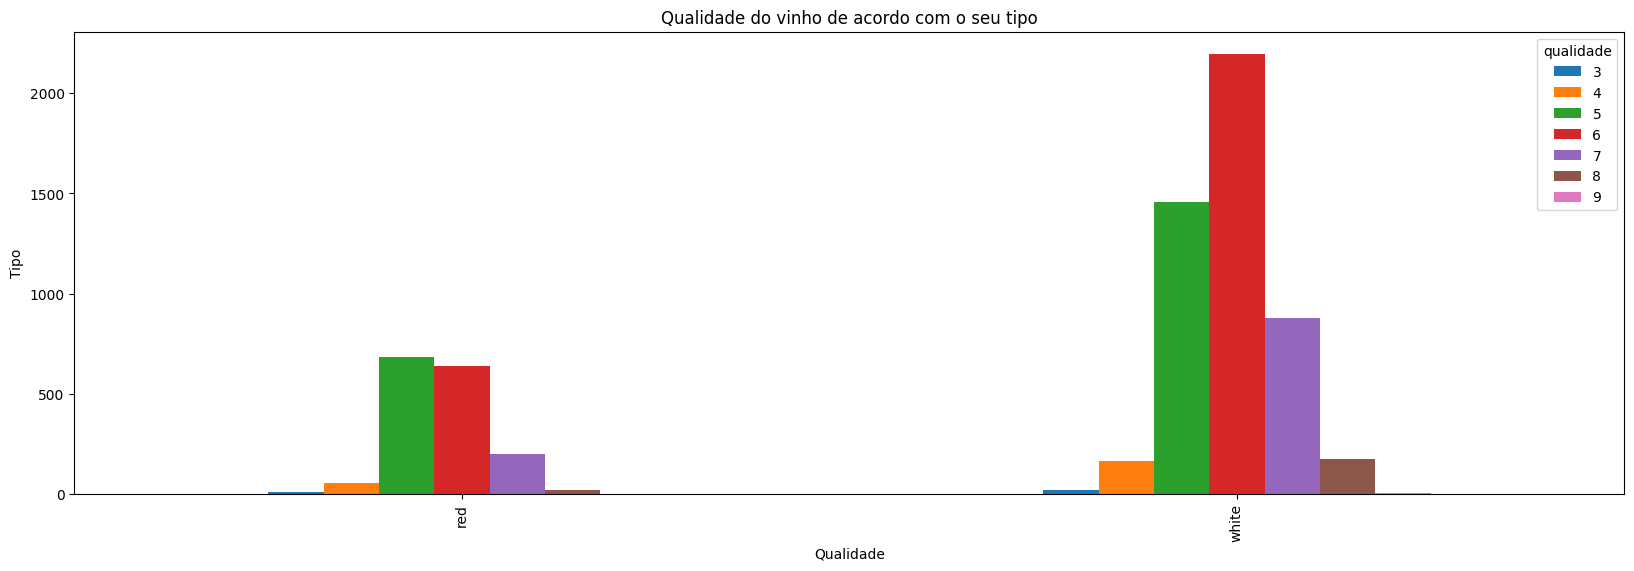

In [38]:
# Comparando os vinhos branco e tinto de acordo com a qualidade
pd.crosstab(ds.tipo, ds.qualidade).plot(kind="bar", figsize=(20,6))
plt.title("Qualidade do vinho de acordo com o seu tipo")
plt.xlabel("Qualidade")
plt.ylabel("Tipo")
plt.show()